In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import tensorflow as tf

In [2]:
images = {} #image_file:RGB
for file in glob.glob("./data/*"):
    im = cv2.imread(file) # BGR
    images[file] = im

1107
(640, 640, 3)


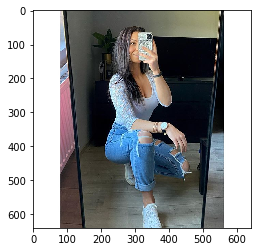

In [5]:
print(len(images.values()))
print(list(images.values())[0].shape)
plt.imshow(list(images.values())[0][:,:,[2,1,0]]) # conver to RGB

In [4]:
keys = list(images.keys())
for k in keys:
    images[k] = images[k][::8,::8,[2,1,0]]
    if images[k].shape != (80, 80, 3):
        del images[k]

In [5]:
X_data = [] #image
Y_data = [] #like/follower ratio
import csv
with open('./data.csv', newline='') as csvfile:
    r = csv.reader(csvfile, delimiter=',', quotechar='|')
    count = 0
    for row in r:
        if count == 0:
            print(row)
            count += 1
            continue
        
        adjusted_file_name = "./data/" + row[0] + ".jpg"
        target = float(row[1])/float(row[3])
        try:
            X_data.append(images[adjusted_file_name])
            Y_data.append(target)
        except:
            print("Purged", adjusted_file_name)

['uid', 'likes', 'comments', 'followers']
Purged ./data/B-CvmpLjnFA.jpg
Purged ./data/B-FcNA0qIpy.jpg
Purged ./data/B-FdYgAAUIY.jpg
Purged ./data/B-Fe6YUJxDt.jpg
Purged ./data/B-Ffe9dn_MJ.jpg
Purged ./data/B-FfY9dBy60.jpg
Purged ./data/B-FgyeTn_Jq.jpg
Purged ./data/B-FThFIp98s.jpg
Purged ./data/B-FUNajhufC.jpg
Purged ./data/B-HWdyuADtt.jpg
Purged ./data/B-I-dtTglHt.jpg
Purged ./data/B-IgEbgoNXc.jpg
Purged ./data/B-IhNH0lDqO.jpg
Purged ./data/B-IWuSbpzlX.jpg


In [6]:
len(X_data) == len(Y_data)

True

In [7]:
# INPUT SHAPE
print(X_data[0].shape)
# OUTPUT SHAPE
print(Y_data[0]) # float, likes per follower

(80, 80, 3)
0.08950111690245718


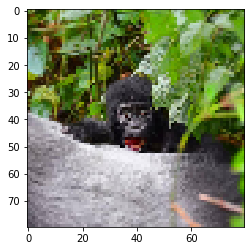

In [8]:
plt.imshow(X_data[50])

(array([  1.,   2.,   6.,   5.,  16.,  27.,  45.,  45.,  70.,  82., 101.,
        112.,  98.,  72.,  54.,  32.,  16.,  10.,   3.,   5.]),
 array([-8.02588046, -7.59908276, -7.17228507, -6.74548737, -6.31868968,
        -5.89189198, -5.46509428, -5.03829659, -4.61149889, -4.1847012 ,
        -3.7579035 , -3.3311058 , -2.90430811, -2.47751041, -2.05071271,
        -1.62391502, -1.19711732, -0.77031963, -0.34352193,  0.08327577,
         0.51007346]),
 <a list of 20 Patch objects>)

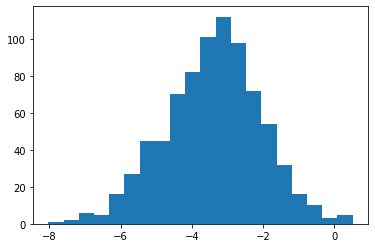

In [9]:
Y_data_norm = [np.log(a) for a in Y_data] # normalization
plt.hist(Y_data_norm, bins = 20)

(array([  3.,  11.,  43.,  90., 152., 213., 170.,  86.,  26.,   8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

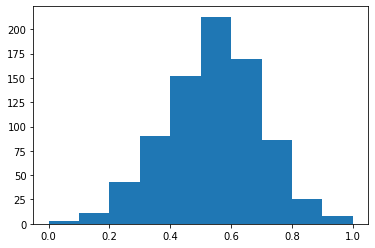

In [10]:
Y_data_norm_2 = [(a-min(Y_data_norm))/(max(Y_data_norm) - min(Y_data_norm)) for a in Y_data_norm]
plt.hist(Y_data_norm_2)

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(128,(3,3), activation="relu", input_shape=X_data[0].shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(.1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation="sigmoid"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [12]:
model.compile(loss=tf.keras.losses.mean_squared_error,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mse'])

In [13]:
X_data = tf.cast(np.asarray(X_data), tf.float64)/255
X_train = X_data[20:]
Y_train = Y_data_norm_2[20:]
X_test = X_data[:20]
Y_test = Y_data_norm_2[:20]

0.49233321020513965


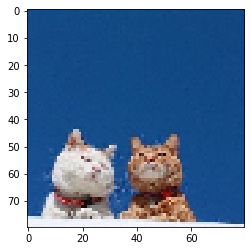

In [14]:
plt.imshow(X_test[1])
print(Y_test[1])

In [15]:
model.fit(X_train, np.asarray(Y_train),
        validation_data=(np.asarray(X_test), np.asarray(Y_test)),
        batch_size = 32,
        epochs=4,
        verbose=2)

Train on 782 samples, validate on 20 samples
Epoch 1/4
782/782 - 10s - loss: 22.3834 - mse: 22.3834 - val_loss: 16.9487 - val_mse: 16.9487
Epoch 2/4
782/782 - 10s - loss: 4.7491 - mse: 4.7491 - val_loss: 0.5073 - val_mse: 0.5073
Epoch 3/4
782/782 - 10s - loss: 0.2153 - mse: 0.2153 - val_loss: 0.0720 - val_mse: 0.0720
Epoch 4/4
782/782 - 9s - loss: 0.0885 - mse: 0.0885 - val_loss: 0.0513 - val_mse: 0.0513


0.49233321020513965


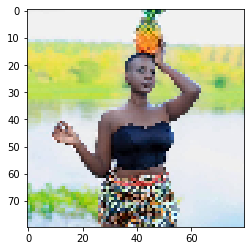

In [16]:
plt.imshow(X_test[7])
print(Y_test[1])

(array([1., 1., 3., 2., 3., 6., 1., 2., 0., 1.]),
 array([0.30431523, 0.36319295, 0.42207067, 0.48094839, 0.53982612,
        0.59870384, 0.65758156, 0.71645928, 0.775337  , 0.83421473,
        0.89309245]),
 <a list of 10 Patch objects>)

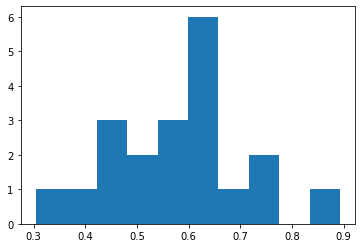

In [17]:
plt.hist(Y_test)

In [21]:
Y_predict = model.predict(tf.cast(np.asarray(X_test), tf.float64))
[(a-b)*10 for a,b in zip(Y_test,Y_predict)]

[array([2.2943196], dtype=float32),
 array([4.389111], dtype=float32),
 array([5.2266645], dtype=float32),
 array([1.9674709], dtype=float32),
 array([0.12627006], dtype=float32),
 array([1.6979108], dtype=float32),
 array([2.441254], dtype=float32),
 array([2.9447002], dtype=float32),
 array([2.6375911], dtype=float32),
 array([0.27778774], dtype=float32),
 array([1.3245592], dtype=float32),
 array([-0.6208053], dtype=float32),
 array([-0.8391139], dtype=float32),
 array([0.96551687], dtype=float32),
 array([0.83812535], dtype=float32),
 array([3.5583057], dtype=float32),
 array([-0.87669075], dtype=float32),
 array([0.44620395], dtype=float32),
 array([-1.4730239], dtype=float32),
 array([1.4527947], dtype=float32)]